# **Checking Colab Resources**

In [1]:
!nvidia-smi

Sat Jul 31 13:04:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     6W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#**Step 1 : Cloning and Building Darknet**
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.

In [2]:
# clone darknet repository
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15298, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 15298 (delta 1), reused 7 (delta 1), pack-reused 15289
Receiving objects: 100% (15298/15298), 13.70 MiB | 19.72 MiB/s, done.
Resolving deltas: 100% (10383/10383), done.


In [3]:
# change makefile to have GPU and OPENCV enabled
%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [4]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [5]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

#**Step 2 : Installing and Importing required Python Libraries**

In [6]:
import re
import random
import sqlite3
import cv2
from google.colab.patches import cv2_imshow
from datetime import datetime


# **Step 3 : Linking Google Drive**

In [7]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [8]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

#listing google drive contents
!ls /mydrive

# cd back into the darknet folder
%cd darknet

 Classroom	   'Getting started.pdf'   Project_Photo
'Colab Notebooks'  'My Drive'		   yolov4
'f&f.ipynb'	   'New folder'		   yolov4.zip
/content/darknet


# **Step 4 : Moving Required Files to Colab Notebook**

In [9]:
# Copying Custom configuration file into Darknet's cfg Folder
!cp /mydrive/yolov4/yolov4-obj-lpd.cfg ./cfg
!cp /mydrive/yolov4/yolov4-obj-lpocr.cfg ./cfg

In [10]:
# Copying obj.names and obj.data files into Darknet's data Folder
!cp /mydrive/yolov4/obj_lpd.names ./data
!cp /mydrive/yolov4/obj_lpd.data  ./data

!cp /mydrive/yolov4/obj_lpocr.names ./data
!cp /mydrive/yolov4/obj_lpocr.data  ./data

# **Step 5 - Define Helper Function**

This function will allow you to show the image in your Colab Notebook after running your detections.

In [11]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# **Step 7: Run Your Model**

In [12]:
# need to set our custom cfg to test mode
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj-lpd.cfg
!sed -i 's/subdivisions=64/subdivisions=1/' yolov4-obj-lpd.cfg

!sed -i 's/batch=64/batch=1/' yolov4-obj-lpocr.cfg
!sed -i 's/subdivisions=64/subdivisions=1/' yolov4-obj-lpocr.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [17]:
# Saving image path in file named Cars.txt
file_name = "Cars.txt"
with open(file_name, "w") as f:
    f.write('/mydrive/Project_Photo/Cars1.png')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 route  8 2 	                           ->  304 x 304 x 128 
  10 conv 

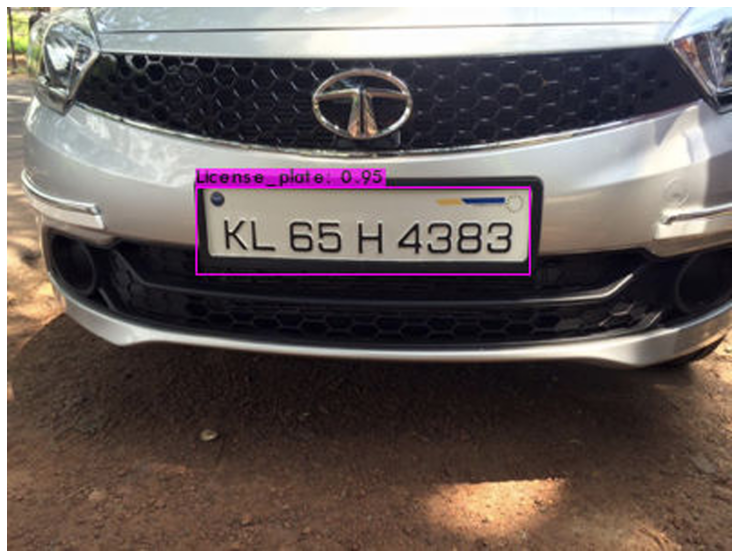

In [18]:
# running model
!./darknet detector test data/obj_lpd.data cfg/yolov4-obj-lpd.cfg /mydrive/yolov4/backup/yolov4-obj_lpd.weights -ext_output < Cars.txt > lpd_result.txt
 
imShow('predictions.jpg')

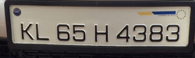

True

In [19]:
# getting bbox coordinates from result.txt file

with open("lpd_result.txt", "r") as f1:
    last_line = f1.readlines()[-1]
#print(last_line)

x = last_line.split()
left = int(x[3]) - 5
top = int(x[5]) - 5
right = int(x[7]) + 10
bottom = int(x[9][0:-1]) + 10

# croping out number plate using bbox cordinates

with open('Cars.txt', 'r') as f2:
    loc = f2.readline()

img = cv2.imread(loc)
crop_img = img[top : top+bottom, left : left+right]
cv2_imshow( crop_img)
cv2.waitKey(0)

cv2.imwrite('ans.png', crop_img)

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 route  8 2 	                           ->  304 x 304 x 128 
  10 conv 

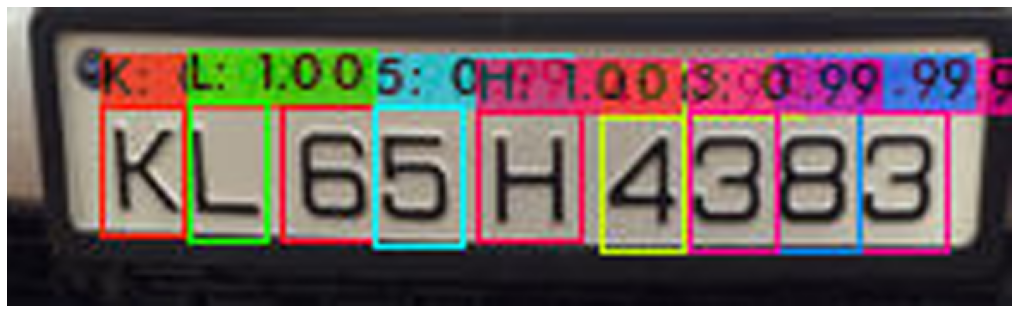

In [20]:
!./darknet detector test data/obj_lpocr.data cfg/yolov4-obj-lpocr.cfg /mydrive/yolov4/backup/yolov4-obj_lpocr.weights -thresh .5 -ext_output ans.png > lpocr_result.txt
 
imShow('predictions.jpg')

In [21]:
nplist = []
with open("lpocr_result.txt", "r") as a1:
    lines = a1.readlines()
for line in lines:
    line = line.strip()  
    x = re.findall(r"[0-9A-Z][:]", line)
    if len(x) == 1:
        nplist.append(x[0])
    
np = ""
for i in nplist:
    i = i.replace(":","")
    np = np + i
print(np)

KL65H4383


#**Model Accuracy**

In [23]:
# Copying test and traing datasets to Colab Notebook
!cp /mydrive/yolov4/obj_lpd.zip ../
!cp /mydrive/yolov4/test_lpd.zip ../

!cp /mydrive/yolov4/obj_lpocr.zip ../
!cp /mydrive/yolov4/test_lpocr.zip ../

# Unziping Datasets into Darknet's data folder
!unzip ../obj_lpd.zip -d data/
!unzip ../test_lpd.zip -d data/

!unzip ../obj_lpocr.zip -d data/
!unzip ../test_lpocr.zip -d data/

Archive:  ../obj_lpd.zip
   creating: data/obj/
  inflating: data/obj/a8b73bbda23f0510.txt  
  inflating: data/obj/fbb2fac932edd958.jpg  
  inflating: data/obj/f9e956cec6fa1ec9.txt  
  inflating: data/obj/b0b3689ee78f7afb.jpg  
  inflating: data/obj/b782d02ca5ca55af.jpg  
  inflating: data/obj/adc8ba3938d94dce.jpg  
  inflating: data/obj/2a2a9bae8748fa29.txt  
  inflating: data/obj/d871e63f9ac8fe20.jpg  
  inflating: data/obj/6e50881e36a1bd2f.txt  
  inflating: data/obj/a6b5e57e9d8b5109.txt  
  inflating: data/obj/a8b48d1c79848ec4.jpg  
  inflating: data/obj/ea86bbe0a3cba9c0.txt  
  inflating: data/obj/a1a52291716afd23.txt  
  inflating: data/obj/f19e940da49a3405.txt  
  inflating: data/obj/18c9887f9f5a5c2c.txt  
  inflating: data/obj/63176f744c6c0617.txt  
  inflating: data/obj/0640fe309e2d025f.txt  
  inflating: data/obj/66b8b373a922f716.txt  
  inflating: data/obj/7628673cc91ce2a9.jpg  
  inflating: data/obj/4db282494a6f7f76.jpg  
  inflating: data/obj/0058af43e819c7a7.txt  
  infla

In [24]:
# Copying generate_train.py and generate_test.py script to Colab
!cp /mydrive/yolov4/generate_train_lpd.py ./
!cp /mydrive/yolov4/generate_test_lpd.py ./

# simply run both scripts to do the work for you of generating the two txt files.
!python generate_train_lpd.py
!python generate_test_lpd.py

In [25]:
#checking accuracy
!./darknet detector map data/obj_lpd.data cfg/yolov4-obj-lpd.cfg /mydrive/yolov4/backup/yolov4-obj_lpd.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv   

In [26]:
# Copying generate_train.py and generate_test.py script to Colab
!cp /mydrive/yolov4/generate_train_lpocr.py ./
!cp /mydrive/yolov4/generate_test_lpocr.py ./


# simply run both scripts to do the work for you of generating the two txt files.
!python generate_train_lpocr.py
!python generate_test_lpocr.py

In [27]:
#checking accuracy
!./darknet detector map data/obj_lpocr.data cfg/yolov4-obj-lpocr.cfg /mydrive/yolov4/backup/yolov4-obj_lpocr.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv  

#**Model Training(Don't Execute below code)**

In [ ]:
#Downloading predefined cnn network
#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

# train your model!
#!./darknet detector train data/obj_lpocr.data cfg/yolov4-obj-lpocr.cfg yolov4.conv.137 -dont_show -map